## Exploratory Data Analysis

In [100]:
import warnings
warnings.filterwarnings("ignore")


In [101]:
# Load the original diabetes.csv file for Exploratory Data Analysis 
df_original_data = pd.read_csv('diabetes.csv')

# Display basic information about the dataset 
df_original_data.info(), df_original_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  )

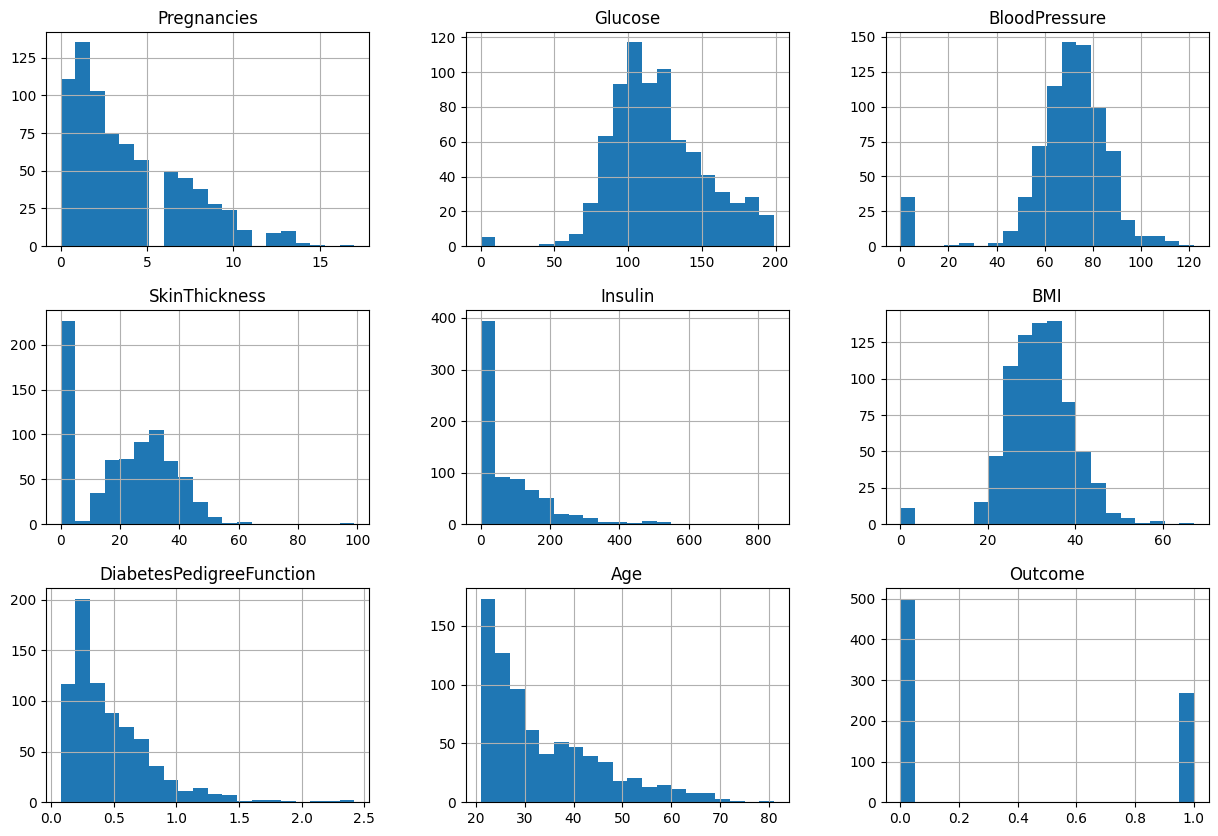

In [102]:
import matplotlib.pyplot as plt
df_original_data.hist(bins=20, figsize=(15, 10))
plt.show()


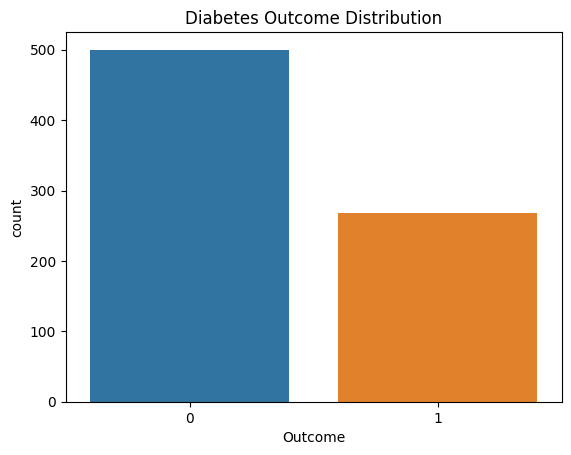

In [103]:
import seaborn as sns

# Plotting the distribution of Outcome
sns.countplot(x='Outcome', data=df_original_data)
plt.title('Diabetes Outcome Distribution')
plt.show()


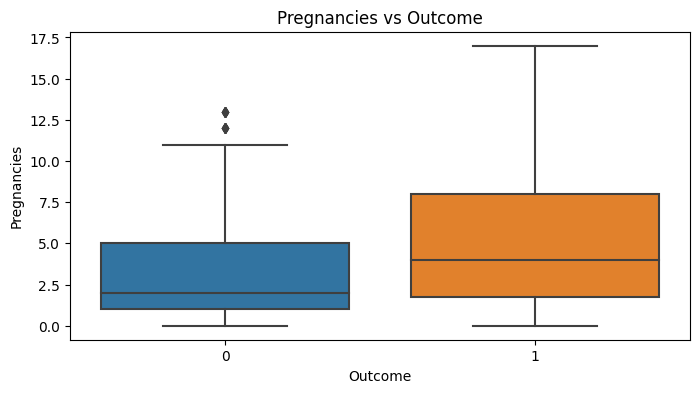

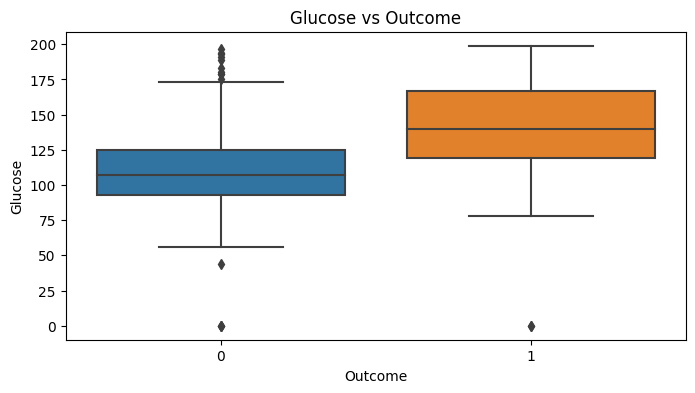

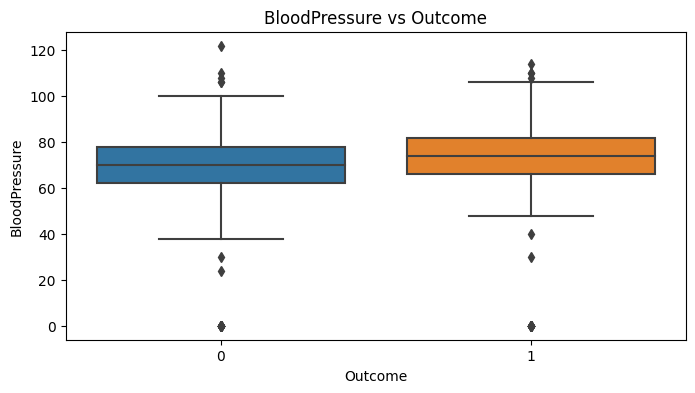

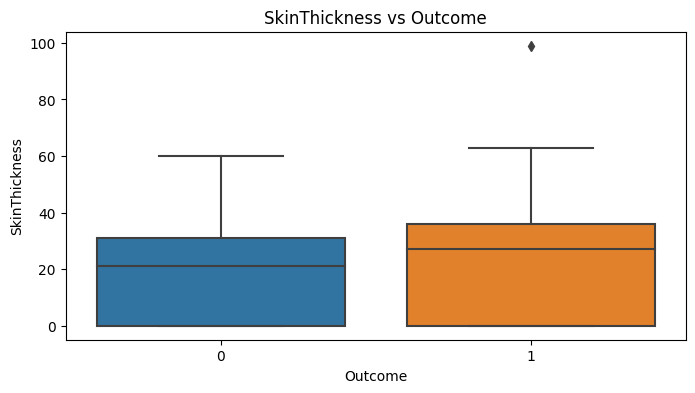

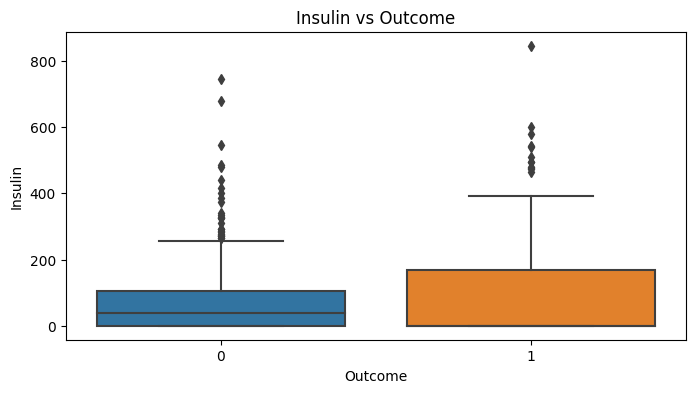

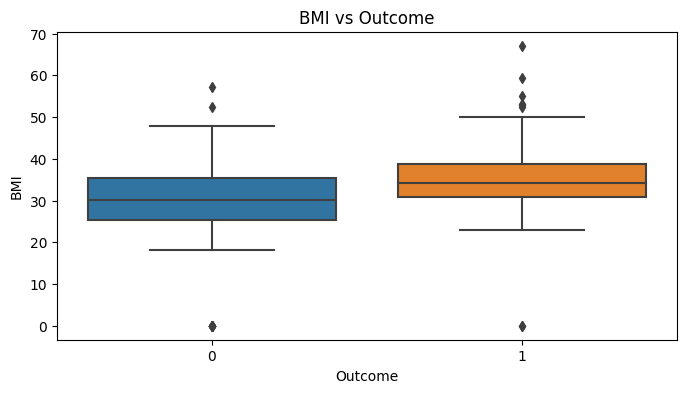

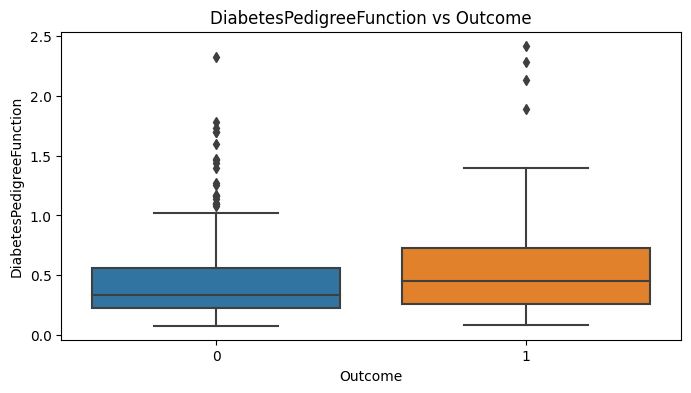

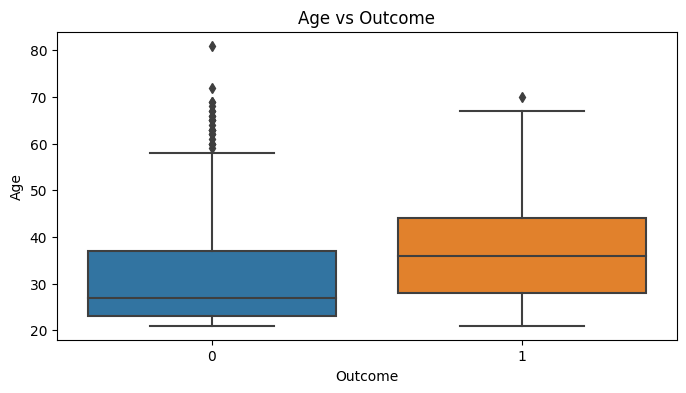

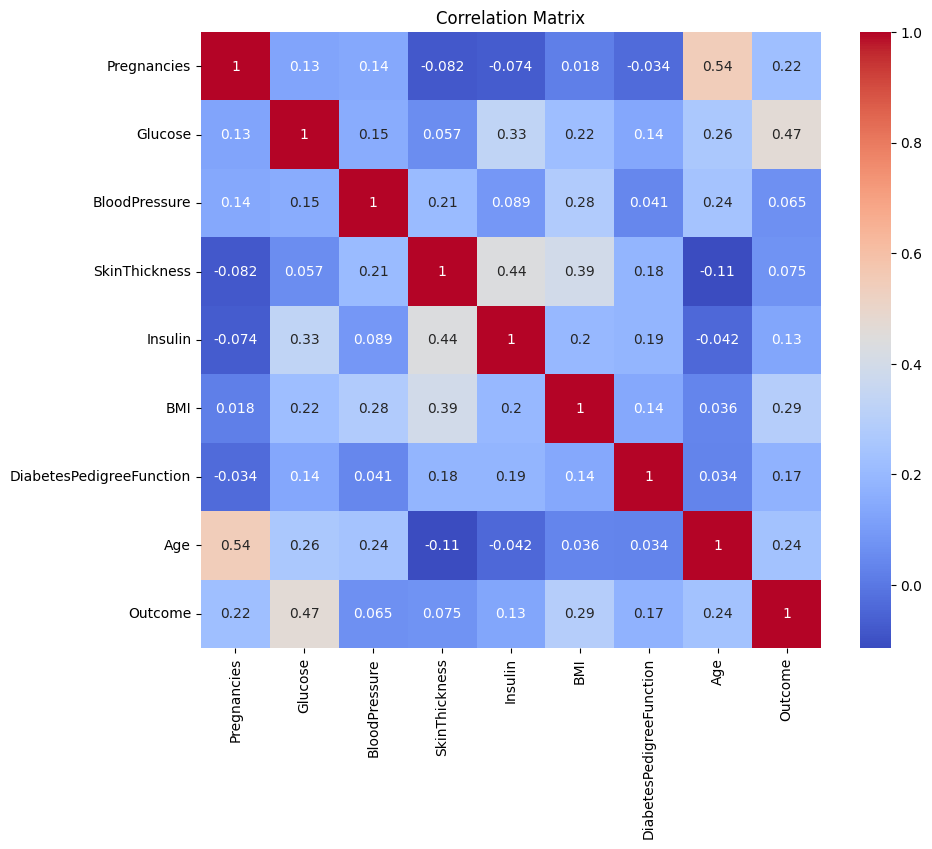

In [104]:
# Compare the distribution of each feature 
for column in df_original_data.columns[:-1]:  
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Outcome', y=column, data=df_original_data)
    plt.title(f'{column} vs Outcome')
    plt.show()

# Generate the correlation matrix
correlation_matrix = df_original_data.corr()  

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  
plt.title('Correlation Matrix')  
plt.show()


## Preparation of pre-processed data

In [13]:
from sklearn.datasets import load_svmlight_file
import pandas as pd

# Load the data
data_path = 'diabetes_scale.txt'  
X, y = load_svmlight_file(data_path)

# Convert sparse matrix X to dense format and create a DataFrame
df = pd.DataFrame(X.toarray())

# add column labels
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
              'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Convert -1 labels to 1 (have diabetes) and 1 to 0 (no diabetes) to match original data
y = pd.Series(y).replace({-1: 1, 1: 0})

# Add the label column y 
df['Outcome'] = y

# Display the first few rows of the DataFrame 
print(df.head())

# Save the labeled data to a CSV file
df.to_csv('diabetes_with_labels.csv', index=False)



   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.294118  0.487437       0.180328      -0.292929 -1.000000  0.001490   
1    -0.882353 -0.145729       0.081967      -0.414141 -1.000000 -0.207153   
2    -0.058824  0.839196       0.049180      -1.000000 -1.000000 -0.305514   
3    -0.882353 -0.105528       0.081967      -0.535354 -0.777778 -0.162444   
4    -1.000000  0.376884      -0.344262      -0.292929 -0.602837  0.284650   

   DiabetesPedigreeFunction       Age  Outcome  
0                 -0.531170 -0.033333      1.0  
1                 -0.766866 -0.666667      0.0  
2                 -0.492741 -0.633333      1.0  
3                 -0.923997 -1.000000      0.0  
4                  0.887276 -0.600000      1.0  


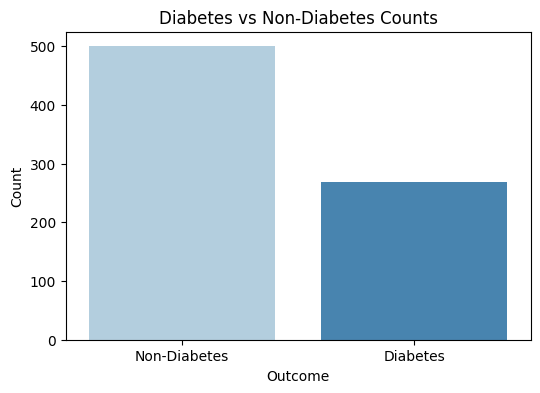

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of people with and without diabetes
diabetes_counts = df['Outcome'].value_counts()

# Plot the counts
plt.figure(figsize=(6,4))
sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values, palette='Blues')
plt.title('Diabetes vs Non-Diabetes Counts')
plt.xticks([0, 1], ['Non-Diabetes', 'Diabetes'])
plt.ylabel('Count')
plt.xlabel('Outcome')
plt.show()


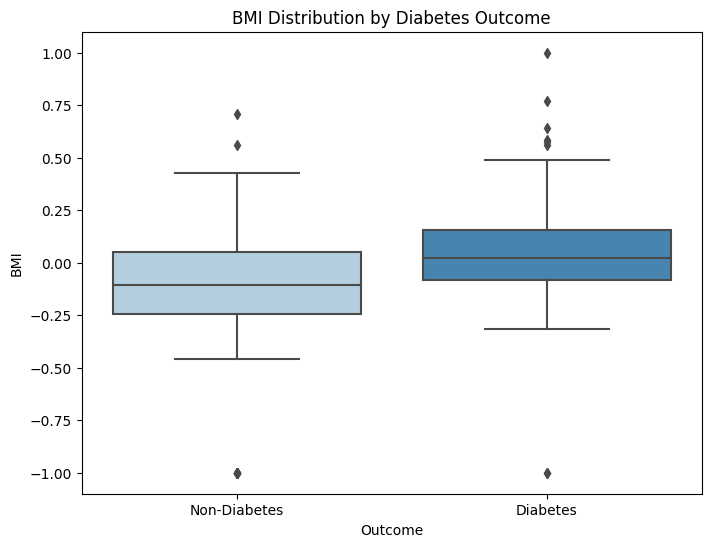

In [107]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Outcome', y='BMI', data=df, palette='Blues')
plt.title('BMI Distribution by Diabetes Outcome')
plt.xticks([0, 1], ['Non-Diabetes', 'Diabetes'])
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()


In [108]:
print(df['Outcome'].value_counts())


0.0    500
1.0    268
Name: Outcome, dtype: int64


## Dataset split

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from keras.wrappers.scikit_learn import KerasClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam



In [15]:
# First, split the dataset into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)

# Then, split the training set further to create a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

## Training the perceptron model

In [16]:
# Initialize and train the Perceptron model
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = perceptron.predict(X_val)

## Model evaluation

In [17]:
# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

Validation Accuracy: 53.90%


Best Parameters: {'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 500, 'penalty': 'l2'}
Validation Accuracy: 73.38%
Test Accuracy with Grid Search: 77.27%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83        99
         1.0       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



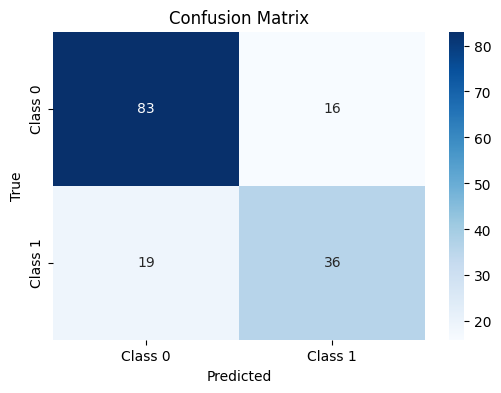

In [18]:
# Define the parameter grid for tuning
param_grid = {
    'eta0': [0.00001, 0.0001, 0.001, 0.01, 0.1],  # more learning rates
    'max_iter': [500, 1000, 2000, 3000],  #  more iterations
    'penalty': ['l2'],  # Stick with L2 since it performed well
    'alpha': [0.00001, 0.0001, 0.001, 0.01]  # Try finer alpha values
}
# Initialize the Perceptron model
perceptron = Perceptron()

# Perform grid search with cross-validation
grid_search = GridSearchCV(perceptron, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best parameters
print(f"Best Parameters: {grid_search.best_params_}")


# Validate the best model on the validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Use the best model on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)


# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy with Grid Search: {test_accuracy * 100:.2f}%')

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()